# Einfluss der Foldanzahl auf die Vorhersagegenauigkeit der Stacking Modelle

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plotlib
%matplotlib inline

from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import r2_score;
import pandas as pd
from sklearn.metrics import make_scorer;
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_friedman1, make_friedman3
from sklearn.utils import check_random_state
from IPython.display import display, Math, Latex,Markdown # rendering latex formula in code output


from dataclasses import dataclass

In [2]:

plt.style.use('ggplot')

plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = [11, 10]

plt.rcParams['font.serif'] = "cm"

plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'




In [3]:
RANDOM_STATE=20132

In [4]:
%run models/stacking_model.ipynb

In [5]:
%run functions/functions.ipynb

In [6]:
linear_regression_model = LinearRegression()

In [7]:
random_forrest_model = RandomForestRegressor(n_estimators=10)

# Definition der Funktion indem die verschiedenen Foldanzahlen getestet werden.

In [8]:
def boxplot_folds(scoring,scorer_name,fold_steps=np.array([2,5,10]), n_splits=5, n_reps=10):
    kf = KFold( n_splits= n_splits, shuffle=True)
    
    for func_index,func in enumerate(function_list): 
        display(Markdown(str(func)))
        data_r2_per_fold = None
    
        for fold_steps_index, n_folds in enumerate(fold_steps):
            folds_stacking = StackingAveragedModels(base_models=[linear_regression_model,random_forrest_model],meta_model=LinearRegression(),n_folds=n_folds)
            
            cv_r2_scores = np.array([])
    
            for i in range(n_reps):
                X, y = func.make(noise=1)
                cv_r2 = cross_val_score(folds_stacking,X,y, scoring=scoring,cv=kf)
                cv_r2_scores =np.append(cv_r2_scores,cv_r2)
           
            cv_r2_scores.sort()    
            if(data_r2_per_fold is None):
                data_r2_per_fold=cv_r2_scores
            else:
                data_r2_per_fold =np.vstack([data_r2_per_fold, cv_r2_scores])
           
        print(data_r2_per_fold)
        fig, ax = plt.subplots()
        fig.set_size_inches(12,10)
        ax.boxplot(data_r2_per_fold.T,labels=[f'{fold_number} folds' for fold_number in fold_steps])
        
        ax.xaxis.set_tick_params(labelsize=28)
        ax.yaxis.set_tick_params(labelsize=28)
        plt.rcParams['axes.titlesize'] = 38

        ax.set_title(f"{scorer_name} scores for: \n "+ str(func))
        
        fig.savefig(f"output_files/f{func_index}_{scorer_name}.pdf", bbox_inches='tight')
        pd.DataFrame( data_r2_per_fold.T,columns=[f"{folds} folds" for folds in fold_steps]).to_csv(f"output_files/data_f{func_index}_{scorer_name}.csv",sep=",")

       #for fold_index, fold_number in enumerate(fold_steps):
       #    data_r2_per_fold[fold_index].T.tofile(f"output_files/data_f{func_index}_{scorer_name}_n_folds_{fold_number}.csv",sep=",")
       #
        
        plt.show()


Untersuchung der $R^2$ Werte 

$f_{0}(x)=2.55 \left(x > -2\right) - 2 \left(x > 0\right)$
$  + 4 \left(x > 2\right) - \left(x > 3\right) - 2 \left(x < -3\right)$

[[0.35156269 0.39060241 0.49173316 0.49194601 0.50609133 0.51155563
  0.56310383 0.58138854 0.61819689 0.63487257 0.6416969  0.64173626
  0.65504184 0.65589649 0.66388296 0.6651477  0.66907052 0.67479021
  0.68437835 0.68685585 0.69412004 0.6970447  0.70072499 0.70074309
  0.70134419 0.70787847 0.7129832  0.7162019  0.71836736 0.73053518
  0.73261595 0.73280196 0.73341272 0.73699364 0.7499414  0.75520237
  0.75639915 0.75725916 0.75765748 0.76460954 0.78455884 0.78886902
  0.79482761 0.80373296 0.8098877  0.81033436 0.81370852 0.82322416
  0.82588786 0.82812389]
 [0.29528244 0.51195605 0.51759643 0.52686285 0.58895416 0.59001637
  0.59578966 0.6032695  0.62643104 0.6301926  0.63763806 0.64305334
  0.65544566 0.65712576 0.66702314 0.66832858 0.67192668 0.67216651
  0.6732837  0.68110165 0.68429572 0.71225583 0.71655679 0.71996914
  0.72335661 0.72817554 0.73590403 0.73661789 0.73988897 0.74008988
  0.74124281 0.74387273 0.7440188  0.74556009 0.75441904 0.75450598
  0.75897998 0.76197685

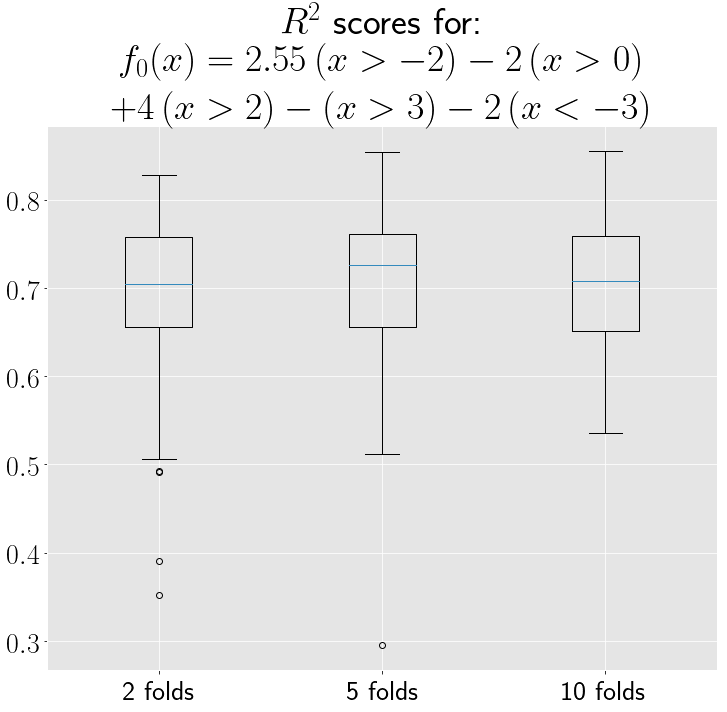

$f_{1}(x)=0.005 x^{3} - 0.36 x^{2} + 0.4 x + 6$

[[0.49548886 0.49616921 0.52268868 0.54437307 0.56675363 0.57548268
  0.57635397 0.57972996 0.59297381 0.5940443  0.60648902 0.6345366
  0.63474145 0.65304249 0.67188202 0.67545556 0.67940359 0.68926891
  0.69327221 0.70431474 0.71424797 0.71758037 0.71788345 0.71809065
  0.72423867 0.72778963 0.73173764 0.73295366 0.74109237 0.74173845
  0.74488605 0.74949477 0.75382769 0.75561548 0.76954791 0.77034043
  0.77199356 0.77252408 0.77772486 0.78178821 0.78783589 0.79346675
  0.79499654 0.80184828 0.81445247 0.81504532 0.82161127 0.83504301
  0.85479233 0.86226993]
 [0.46915241 0.58190582 0.5971468  0.61560237 0.62592722 0.63050508
  0.63569645 0.63688211 0.64337031 0.65149867 0.67174988 0.67218468
  0.67664707 0.68176892 0.68489417 0.69209403 0.69675221 0.70142712
  0.70356724 0.71310043 0.7140188  0.72364783 0.72383705 0.72422251
  0.72830093 0.72878907 0.73384284 0.73445323 0.73465569 0.74486153
  0.74804412 0.74998952 0.76787899 0.77092107 0.77460402 0.7758647
  0.7772905  0.78388576 0

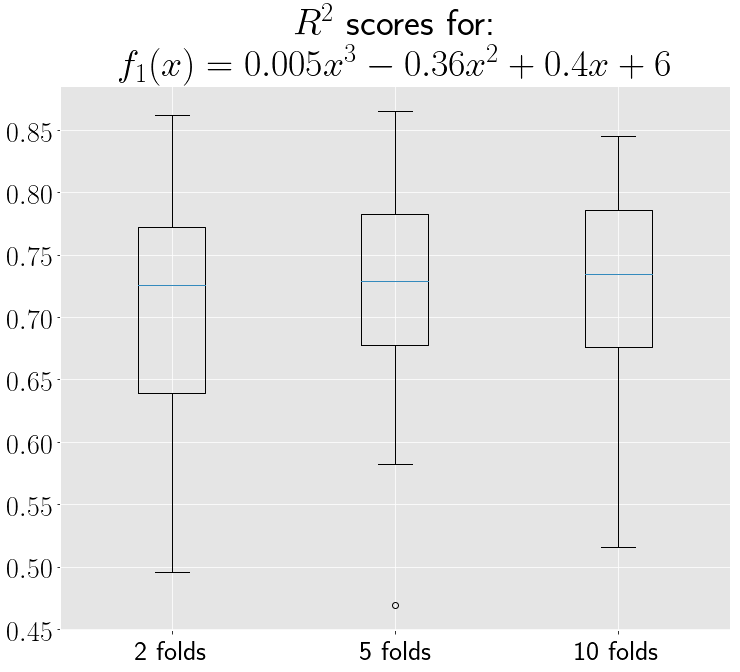

$f_{2}(x)=2.83 \sin{\left (\frac{\pi x}{2} \right )}$

[[0.61563226 0.6216062  0.62488972 0.63671887 0.66905644 0.67067653
  0.67234475 0.67601637 0.68038979 0.68392214 0.68741738 0.68815517
  0.68832083 0.6929971  0.69577917 0.70267887 0.70688711 0.70958634
  0.71410116 0.71455912 0.71641847 0.71725034 0.72997438 0.73060081
  0.73274869 0.74074064 0.74265895 0.74430367 0.74692638 0.74820642
  0.7486797  0.7510953  0.7524532  0.75450273 0.75717018 0.75858629
  0.76518201 0.76580347 0.76641474 0.76683874 0.76841039 0.77200909
  0.77420554 0.79556146 0.79882545 0.8037376  0.8048987  0.80941172
  0.81116745 0.84296821]
 [0.61846277 0.62134297 0.64123774 0.65265325 0.65658023 0.66565702
  0.66757526 0.67042813 0.67206031 0.67747174 0.68130675 0.69471638
  0.70363017 0.70537401 0.70931511 0.71161625 0.71983136 0.72167018
  0.72845449 0.73294764 0.73788543 0.74439037 0.74694764 0.74737485
  0.74983379 0.75388912 0.75424347 0.75446216 0.75522682 0.75620191
  0.75951155 0.76120938 0.7626327  0.7642895  0.76620818 0.7674722
  0.76837177 0.7687223  

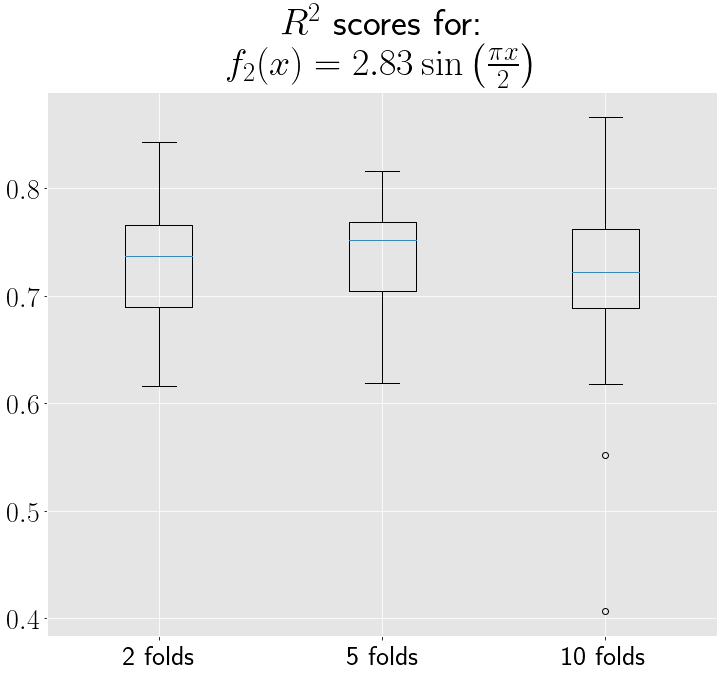

$f_{3}(x)=4.0 \sin{\left (3 \pi x \right )} \left(x \geq 0\right)$

[[0.24390221 0.32084577 0.33473748 0.33519833 0.35613447 0.35912307
  0.36353631 0.37772403 0.37889351 0.38216536 0.38270294 0.3959841
  0.40436649 0.40762099 0.41669926 0.42104998 0.42198995 0.43600103
  0.43717252 0.44411796 0.44583207 0.45164727 0.4576298  0.46090433
  0.47585385 0.47665028 0.47712099 0.47943558 0.48630645 0.50469355
  0.50617438 0.52501032 0.52520711 0.5267821  0.52746916 0.53353287
  0.54155488 0.54253926 0.55417187 0.55462932 0.57047428 0.58620352
  0.58680071 0.60378923 0.60716296 0.60809576 0.61264287 0.6207241
  0.69091411 0.7040987 ]
 [0.36888037 0.40722117 0.41091381 0.4259027  0.44963483 0.4767217
  0.48592653 0.50058444 0.50181642 0.54574659 0.54588319 0.54775625
  0.56694834 0.56701379 0.57413907 0.58428345 0.59579176 0.60057384
  0.60251263 0.60931565 0.61274919 0.61336003 0.6202807  0.62169901
  0.63581358 0.64248989 0.64347292 0.6504347  0.65058996 0.66398615
  0.66963126 0.67085733 0.67366825 0.67582941 0.68034082 0.68509794
  0.69009133 0.69786444 0.

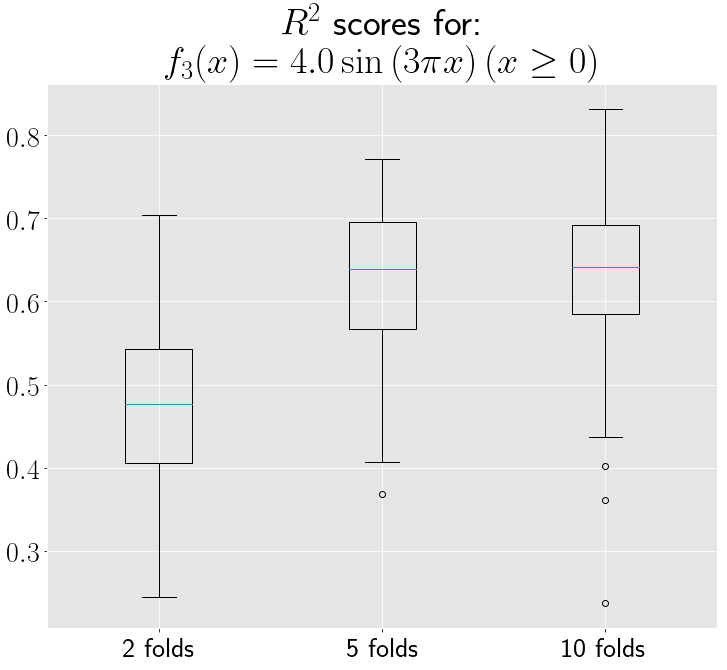

$f_{4}(x)=x$

[[0.56019185 0.7165752  0.71812501 0.7233551  0.74771627 0.75045344
  0.75267743 0.76694619 0.78428901 0.79482439 0.79493982 0.79668756
  0.79805007 0.79979733 0.80075505 0.80721101 0.80736328 0.81607866
  0.81919328 0.82593255 0.82690083 0.83019946 0.83211774 0.83694876
  0.83963552 0.84002162 0.84123571 0.84474845 0.84777921 0.85266569
  0.85283815 0.85472971 0.85640197 0.86012946 0.86171638 0.86545503
  0.86971986 0.87015016 0.87262901 0.87265578 0.87503246 0.87614386
  0.8807226  0.88340995 0.88495163 0.88856167 0.88913505 0.89201238
  0.90038136 0.9061664 ]
 [0.66478965 0.71060482 0.7364167  0.73893438 0.77054156 0.77271251
  0.77412018 0.79439387 0.79594658 0.79766568 0.79931392 0.80005828
  0.80259834 0.80283259 0.8039939  0.81145641 0.8175741  0.81937652
  0.82982389 0.83028523 0.83417867 0.83430376 0.83534276 0.83600779
  0.83678021 0.84095935 0.84179636 0.84275925 0.84605576 0.85012007
  0.8503664  0.85106041 0.85251032 0.85843936 0.86077028 0.86265688
  0.8627864  0.86392535

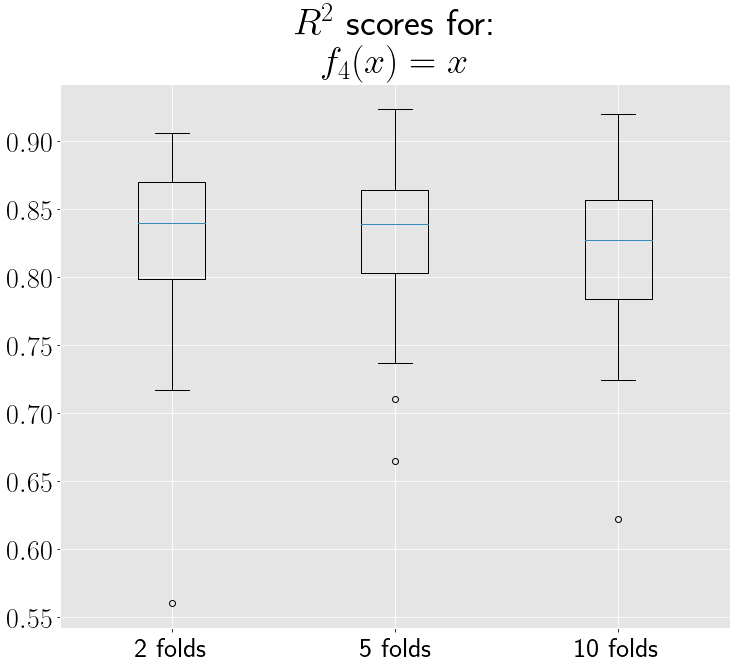

$f_{5}(x) = random.normal(-1, 1)$

[[-0.32790618 -0.20816598 -0.16824244 -0.15161516 -0.13003858 -0.12285541
  -0.09753399 -0.07670636 -0.07514613 -0.06354603 -0.06235395 -0.06210581
  -0.0613732  -0.06071072 -0.05071053 -0.04672254 -0.04576134 -0.04482545
  -0.04055739 -0.03669619 -0.02871032 -0.02864907 -0.0278003  -0.02459125
  -0.0240655  -0.02250449 -0.0206797  -0.01987689 -0.01958991 -0.01824185
  -0.01544283 -0.0124803  -0.01067585 -0.01035563 -0.00889114 -0.00779206
  -0.00717293 -0.0067559  -0.00545671 -0.00466238 -0.00464238  0.00298141
   0.00570928  0.0076609   0.01767095  0.02347562  0.02576066  0.04482801
   0.0451926   0.06814865]
 [-0.15040455 -0.13660485 -0.13573451 -0.12543026 -0.11034499 -0.09988929
  -0.09638917 -0.09455619 -0.08421656 -0.0817853  -0.06332481 -0.06039267
  -0.05635549 -0.04812399 -0.04732197 -0.04722574 -0.04251361 -0.03940285
  -0.03588921 -0.03273973 -0.02973998 -0.02849827 -0.02393305 -0.022193
  -0.01920414 -0.01897355 -0.01466643 -0.01295116 -0.01157275 -0.01067172
  -0.00886428

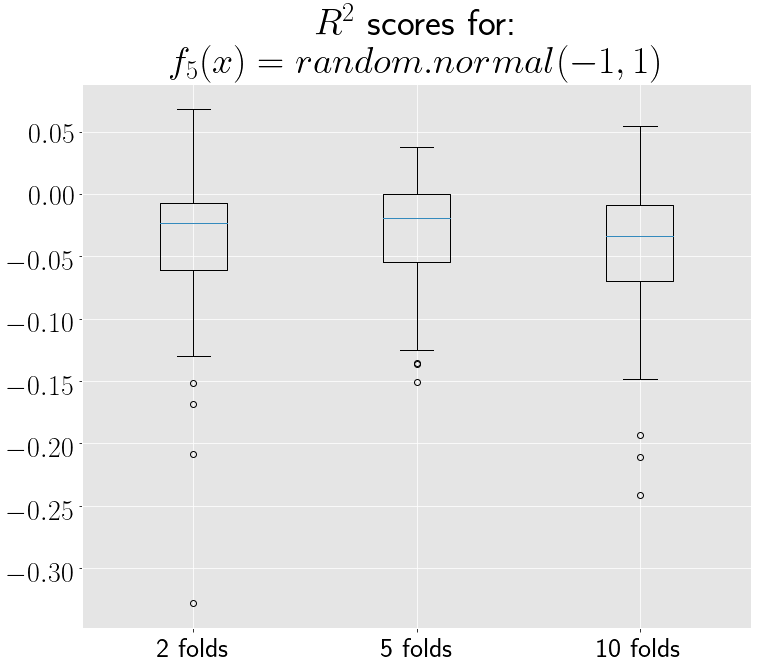

$f_{6}(x)=4.0 \sin{\left (3 \pi x \right )} \left(x \geq 0\right) + (-2 * x + 4) ( x < 0)$

[[0.77571295 0.80100935 0.81151094 0.81905399 0.83312505 0.83776373
  0.84538831 0.8523058  0.85284049 0.85437691 0.87163814 0.87383899
  0.87726371 0.88117068 0.88133665 0.88538412 0.88601943 0.89169017
  0.89188466 0.8983888  0.89871419 0.90035779 0.90266118 0.90269705
  0.90909823 0.90952065 0.9124861  0.91370737 0.91379582 0.91479603
  0.91687198 0.91699448 0.91807543 0.91942191 0.91963443 0.92271136
  0.92314918 0.92495249 0.9266724  0.927565   0.92782736 0.931673
  0.93394182 0.93523826 0.93564103 0.93682394 0.93968249 0.94209915
  0.94243198 0.94843235]
 [0.75916145 0.80767328 0.86527523 0.87380289 0.87986301 0.8820532
  0.8860872  0.88994956 0.89038424 0.89114774 0.89119038 0.8939051
  0.89453558 0.89978424 0.90016896 0.9010643  0.9039974  0.90439997
  0.90656824 0.90774157 0.91049527 0.91261504 0.91341617 0.91390232
  0.91653506 0.91832666 0.92172187 0.92218172 0.92431691 0.92568688
  0.92578493 0.92609834 0.92642339 0.92691307 0.93160169 0.93382102
  0.93398114 0.93655656 0.9

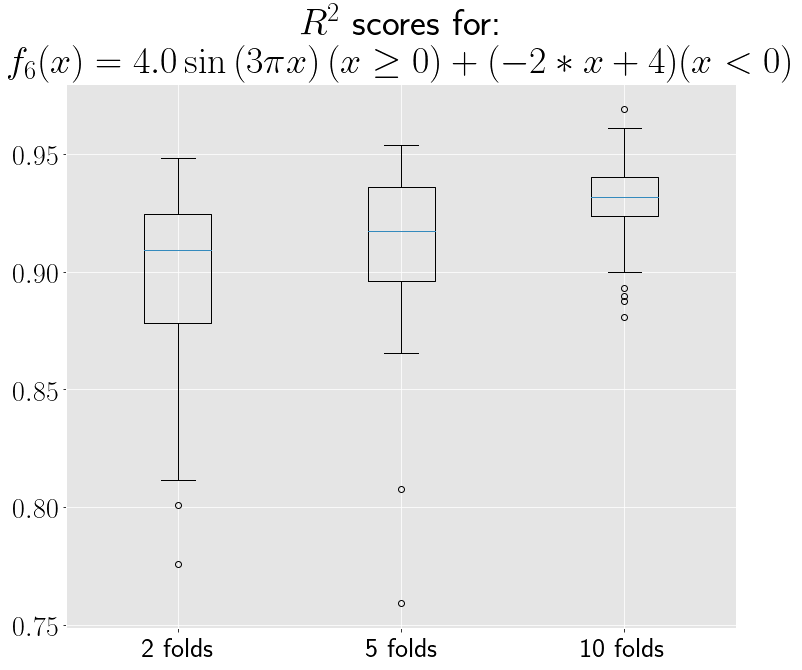

In [9]:
boxplot_folds(scoring="r2",scorer_name="$R^2$")

Definition vom RMSE. Hier wird der Negative RMSE verwendet, weil bei dieser Größere Werte besser und somit scorer immer größere werte als besser laut sklearn definiert sind.

In [10]:
def score_rmse(y, y_pred, **kwargs):
    return np.sqrt(mean_squared_error(y, y_pred))

neg_rmse_score = make_scorer(score_rmse,greater_is_better=False)
    


$f_{0}(x)=2.55 \left(x > -2\right) - 2 \left(x > 0\right)$
$  + 4 \left(x > 2\right) - \left(x > 3\right) - 2 \left(x < -3\right)$

[[-1.57884953 -1.42222155 -1.38997586 -1.37882088 -1.37723274 -1.36977111
  -1.36134665 -1.33242894 -1.31741766 -1.29205797 -1.2891931  -1.28431861
  -1.28176056 -1.27235271 -1.27159415 -1.26545199 -1.26151513 -1.26041647
  -1.25762248 -1.24995059 -1.24663705 -1.24207125 -1.22364176 -1.21991175
  -1.21522606 -1.20944568 -1.20368396 -1.18654287 -1.16415965 -1.15846427
  -1.15132223 -1.13437322 -1.13353299 -1.13343296 -1.11597199 -1.11199371
  -1.10945813 -1.09875924 -1.08877476 -1.04947479 -1.03214972 -1.02953442
  -1.01710704 -1.0128598  -0.9965211  -0.96970463 -0.95587551 -0.93255089
  -0.90327184 -0.82880324]
 [-1.72286279 -1.51561314 -1.50476151 -1.49110965 -1.45471501 -1.38715796
  -1.370968   -1.35864294 -1.31492789 -1.28257228 -1.26849201 -1.26189754
  -1.24205441 -1.24140232 -1.24067032 -1.24061384 -1.23427696 -1.21147167
  -1.20388089 -1.20375342 -1.16982808 -1.16292762 -1.15903842 -1.1534617
  -1.15049676 -1.1474561  -1.13170249 -1.1305077  -1.11869088 -1.11478048
  -1.1078933

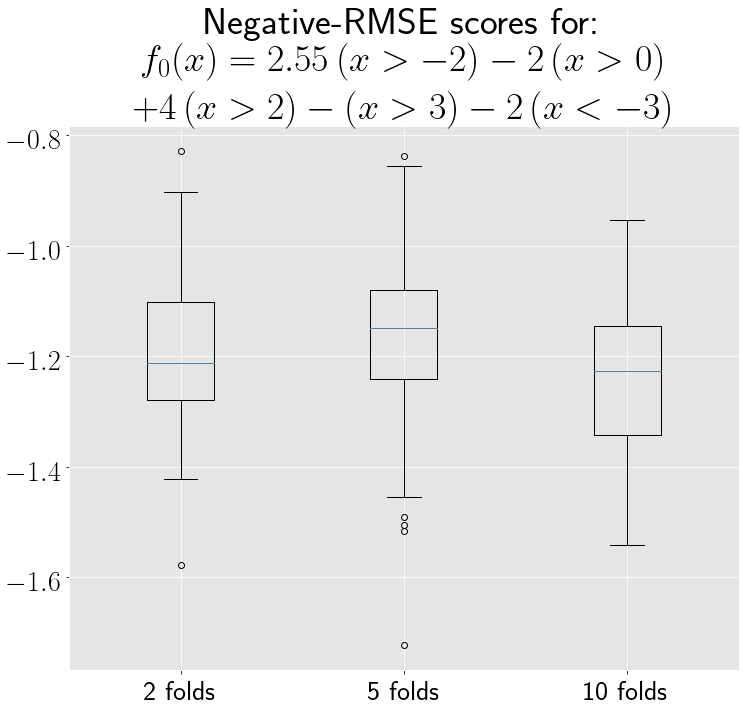

$f_{1}(x)=0.005 x^{3} - 0.36 x^{2} + 0.4 x + 6$

[[-1.57337927 -1.4111467  -1.39180646 -1.34570444 -1.28244761 -1.28092238
  -1.24912647 -1.22793396 -1.22153597 -1.20442609 -1.19644153 -1.18307461
  -1.18015263 -1.17871624 -1.17463756 -1.16860718 -1.16099827 -1.15840443
  -1.15321014 -1.14959425 -1.14422796 -1.14377515 -1.13400647 -1.13351782
  -1.12319351 -1.11145064 -1.11106821 -1.10765665 -1.09368479 -1.08602764
  -1.08504204 -1.08312797 -1.08251351 -1.08063531 -1.0357546  -1.03344901
  -1.02736711 -1.02697499 -1.00190591 -0.99791825 -0.996891   -0.99002917
  -0.98700391 -0.98458895 -0.95897168 -0.93061918 -0.92405327 -0.91665992
  -0.90083966 -0.88279153]
 [-1.4497794  -1.39976704 -1.39212432 -1.33935627 -1.31708046 -1.30106325
  -1.28368053 -1.27709422 -1.27502338 -1.26466073 -1.26115968 -1.25862407
  -1.25026573 -1.20749247 -1.20470342 -1.19290111 -1.16989181 -1.15817884
  -1.15110079 -1.14315378 -1.13842832 -1.1352275  -1.13207662 -1.12700019
  -1.1219427  -1.11905669 -1.11588957 -1.10711831 -1.10221755 -1.09801906
  -1.095258

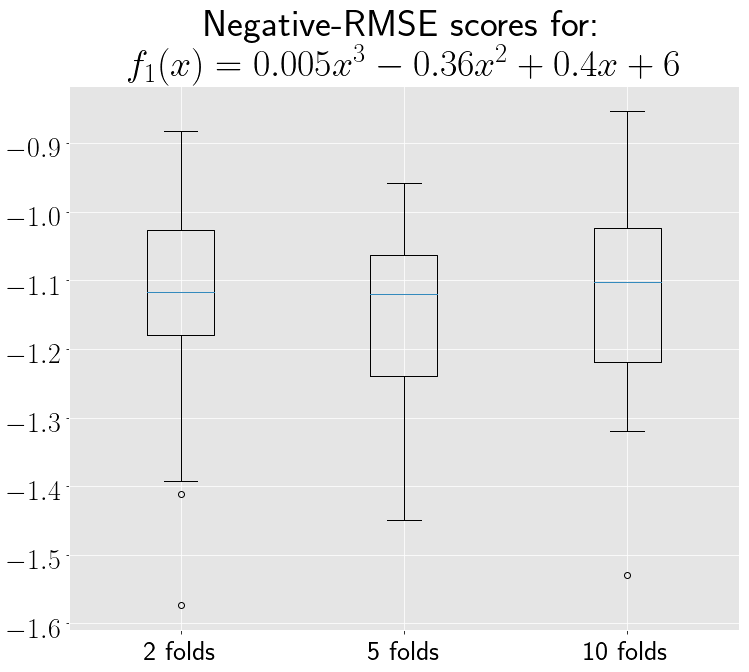

$f_{2}(x)=2.83 \sin{\left (\frac{\pi x}{2} \right )}$

[[-1.50550761 -1.42812253 -1.36231622 -1.30625065 -1.25916033 -1.23747964
  -1.21368831 -1.20838846 -1.20346635 -1.19946505 -1.18896155 -1.18735421
  -1.17261956 -1.16044976 -1.15675818 -1.15470815 -1.14317487 -1.14125184
  -1.1312515  -1.12981738 -1.1285674  -1.12636554 -1.10914239 -1.09726595
  -1.08703458 -1.08108499 -1.08079679 -1.07843025 -1.07006106 -1.06878649
  -1.06756408 -1.06361643 -1.06247169 -1.0617133  -1.06114475 -1.05674995
  -1.03789431 -1.03675591 -1.03060576 -1.02263858 -1.01656142 -0.9982101
  -0.98398644 -0.97371076 -0.95776136 -0.92543807 -0.90791106 -0.88896516
  -0.87173228 -0.86235303]
 [-1.36421171 -1.36016449 -1.35197304 -1.34150803 -1.3357502  -1.31439497
  -1.30583194 -1.26958893 -1.26943433 -1.26856024 -1.26717565 -1.26032946
  -1.25873942 -1.24857982 -1.23523055 -1.23284492 -1.21294421 -1.19767893
  -1.19721125 -1.19412254 -1.19187981 -1.18165845 -1.17627894 -1.1639746
  -1.15613727 -1.15041266 -1.12901588 -1.12001043 -1.11618285 -1.10209658
  -1.09851956

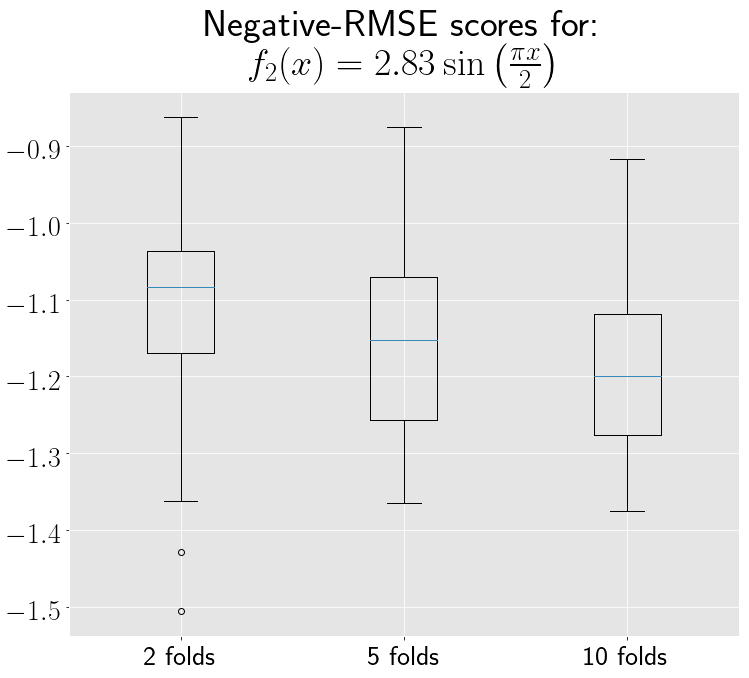

$f_{3}(x)=4.0 \sin{\left (3 \pi x \right )} \left(x \geq 0\right)$

[[-2.36679724 -2.01188891 -1.96691522 -1.92444391 -1.90994737 -1.89445975
  -1.89287527 -1.86717519 -1.84026395 -1.83079104 -1.8134244  -1.78059089
  -1.7708579  -1.68374434 -1.66767727 -1.63556883 -1.62775353 -1.61603017
  -1.6145069  -1.61115995 -1.57790256 -1.57752283 -1.56214869 -1.53705011
  -1.53296414 -1.52068447 -1.5147108  -1.50201287 -1.49666469 -1.49604449
  -1.49365784 -1.47375054 -1.45583306 -1.43414087 -1.42422559 -1.40335235
  -1.38663739 -1.38658889 -1.38171202 -1.37641791 -1.3655808  -1.36550092
  -1.34936017 -1.34147158 -1.32374773 -1.25606874 -1.2077289  -1.19229758
  -1.11989264 -1.10062376]
 [-1.89807017 -1.82785936 -1.68431128 -1.67477746 -1.60112284 -1.59718522
  -1.5898193  -1.55993474 -1.55595399 -1.5260472  -1.51985736 -1.49842864
  -1.49636134 -1.49394173 -1.46098411 -1.45906957 -1.4583211  -1.45648998
  -1.43452655 -1.42741895 -1.41636825 -1.40361785 -1.3917696  -1.38877577
  -1.37700147 -1.37023143 -1.34121058 -1.33406648 -1.33386616 -1.31332117
  -1.292061

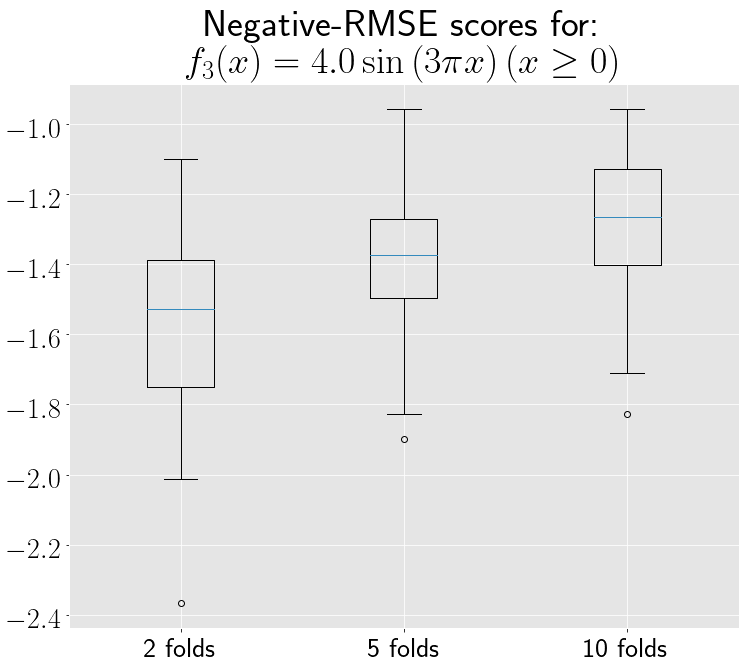

$f_{4}(x)=x$

[[-1.20490988 -1.19398142 -1.19225925 -1.18793785 -1.16363454 -1.14347712
  -1.13491269 -1.129434   -1.12712137 -1.09144957 -1.08904856 -1.07242926
  -1.07116589 -1.06962877 -1.06802698 -1.06710432 -1.06238797 -1.04810831
  -1.04494343 -1.03576612 -1.03493149 -1.02950304 -1.022847   -1.01011954
  -0.99531675 -0.98845464 -0.98771042 -0.97755856 -0.97532262 -0.97225391
  -0.96010019 -0.95409745 -0.94894561 -0.94166604 -0.93371491 -0.92521978
  -0.91986136 -0.91769018 -0.90809792 -0.90664916 -0.90406238 -0.89343141
  -0.89292266 -0.89069436 -0.85353943 -0.8404587  -0.8248001  -0.80936822
  -0.79851729 -0.76215058]
 [-1.23424744 -1.18775909 -1.16343511 -1.14251862 -1.11675331 -1.11377851
  -1.11322519 -1.10421171 -1.0852356  -1.0687019  -1.06075289 -1.05778721
  -1.03338142 -1.02839774 -1.02142202 -1.01771687 -1.01682485 -1.0116491
  -1.01005828 -1.00709071 -1.0047967  -0.9985306  -0.97863272 -0.97742875
  -0.9766863  -0.97621385 -0.96735586 -0.96333557 -0.96273267 -0.95929861
  -0.9577057

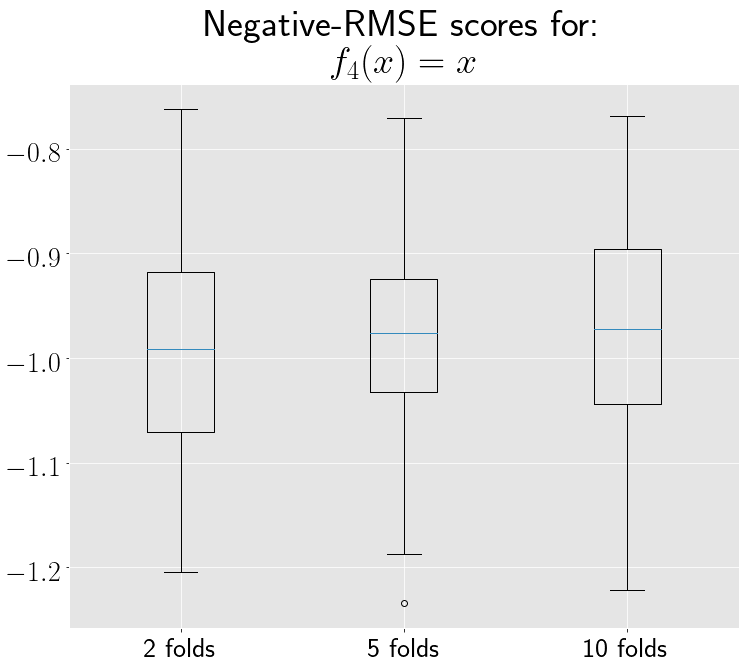

$f_{5}(x) = random.normal(-1, 1)$

[[-1.94880585 -1.87105159 -1.71816583 -1.71020879 -1.6885056  -1.65658786
  -1.58593604 -1.58129849 -1.56268765 -1.55523367 -1.544582   -1.53275829
  -1.52896746 -1.50880052 -1.50769312 -1.48236034 -1.47845678 -1.47376824
  -1.46657017 -1.46036875 -1.45494383 -1.44627282 -1.44473675 -1.42848095
  -1.42648188 -1.40617615 -1.39829821 -1.39734928 -1.39526164 -1.39036709
  -1.37677401 -1.36707813 -1.3630534  -1.35927811 -1.3585092  -1.35815902
  -1.34545464 -1.34458799 -1.33164361 -1.32425067 -1.30898696 -1.3062825
  -1.29792869 -1.29194133 -1.23011554 -1.22805319 -1.21787673 -1.19326468
  -1.09941557 -0.94132682]
 [-1.79766936 -1.70730468 -1.65093524 -1.64941177 -1.60539481 -1.59420305
  -1.58894296 -1.58763441 -1.57716591 -1.56816424 -1.55176163 -1.55165321
  -1.54378906 -1.51459292 -1.50277099 -1.49729857 -1.47954484 -1.47679872
  -1.4748828  -1.47329839 -1.46298439 -1.46183966 -1.45684432 -1.45662068
  -1.43380825 -1.42605446 -1.41535646 -1.40747125 -1.40474446 -1.39414728
  -1.3771023

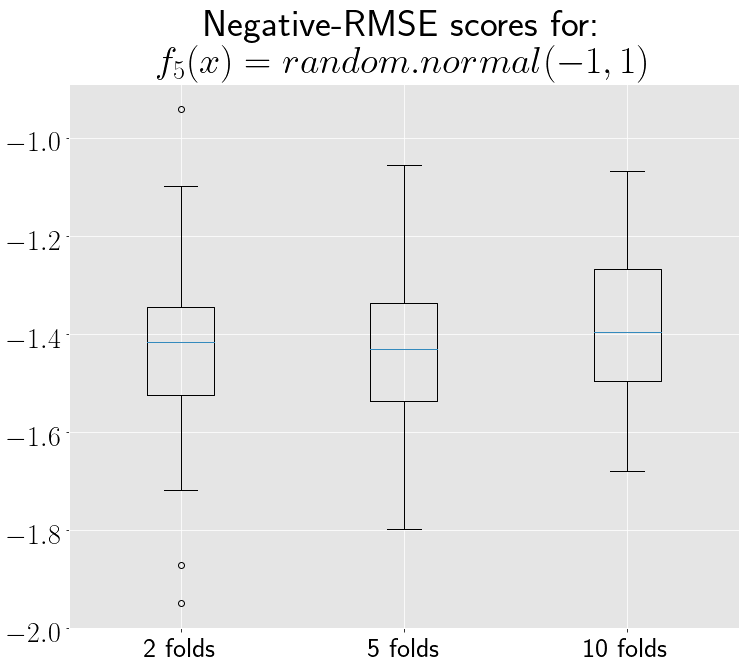

$f_{6}(x)=4.0 \sin{\left (3 \pi x \right )} \left(x \geq 0\right) + (-2 * x + 4) ( x < 0)$

[[-1.97680442 -1.92801502 -1.86570935 -1.76596053 -1.74225131 -1.70090612
  -1.69432141 -1.68621027 -1.68481919 -1.66151861 -1.65793074 -1.65074689
  -1.64712385 -1.63797503 -1.63211178 -1.61851949 -1.60627788 -1.59425743
  -1.58317566 -1.58284397 -1.58078019 -1.56027376 -1.51815021 -1.51779215
  -1.51486161 -1.51224988 -1.50055683 -1.45334136 -1.44298317 -1.43107353
  -1.41928212 -1.41199114 -1.41148097 -1.40142098 -1.36804548 -1.33109403
  -1.32667212 -1.30346662 -1.26961591 -1.26346997 -1.26110134 -1.2572902
  -1.25702396 -1.20408925 -1.20022146 -1.19662077 -1.16704329 -1.05650976
  -1.04844531 -0.99923207]
 [-1.87679564 -1.65385692 -1.63143576 -1.61938598 -1.61174122 -1.60699388
  -1.59629368 -1.58952145 -1.56055164 -1.51939027 -1.51312671 -1.50704863
  -1.50079082 -1.49387157 -1.4802098  -1.47968466 -1.42072346 -1.40874618
  -1.40360796 -1.40324093 -1.39927277 -1.3854174  -1.36829566 -1.33782571
  -1.32542472 -1.32126282 -1.31919027 -1.30895916 -1.29934167 -1.29783019
  -1.2875193

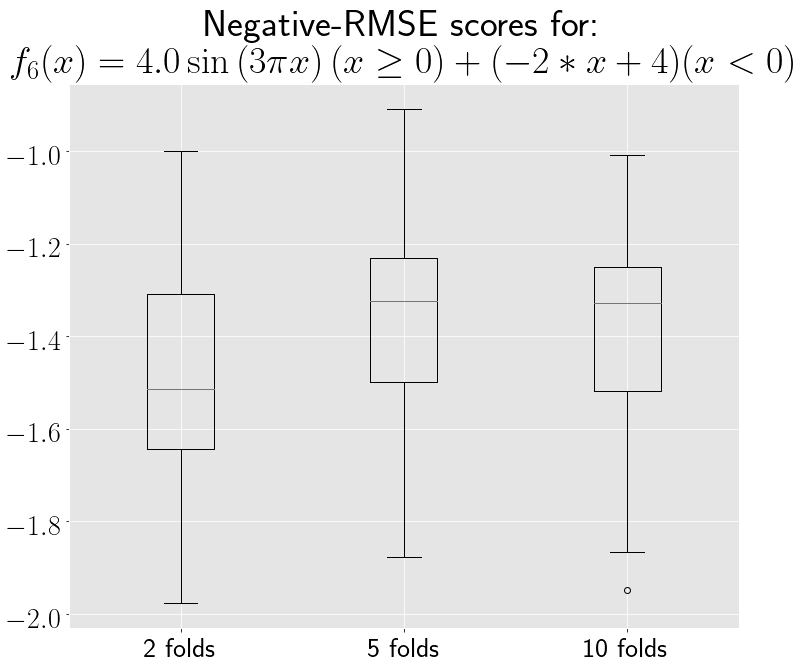

In [11]:
boxplot_folds(scoring=neg_rmse_score, scorer_name="Negative-RMSE")